# <font color='#F5B167'> MD009 Ejemplo de ajuste (distribución gamma) </font>

Generamos una muestra según una distribución $\Gamma$ con parámetros $\lambda=0.5$ (rate) y $\alpha=3.5$ (shape).

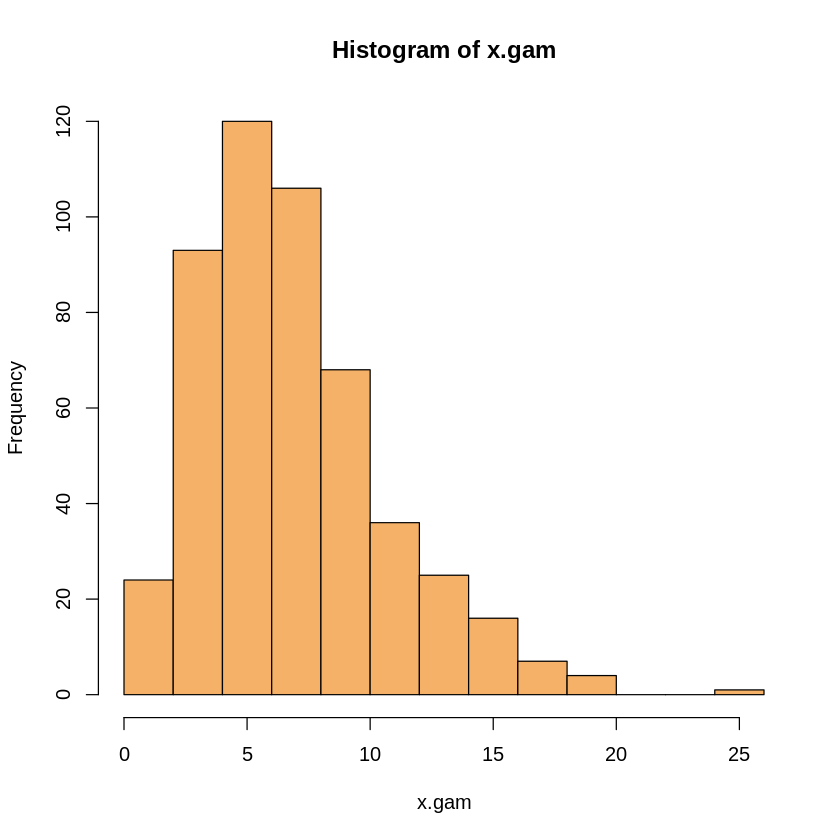

In [1]:
x.gam = rgamma(500, shape = 3.5, rate = 0.5)
hist(x.gam, col = '#F5B167')

A continuación ajustaremos los parámetros utilizando el método de máximo likelihood, mle(). Recordemos que la PDF es:

\begin{equation*}
\frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}
\end{equation*}

Con mle(), hemos de escribir explícitamente la expresión del -log Likelihood (LL). Y como valores iniciales de los parámetros, escogemos, arbitrariamente (suponiendo que desconocemos el valor usado en la generación), $\lambda=2$ (rate), $\alpha=1$ (shape).

In [2]:
library(stats4)
LL <- function(alpha, lambda) {
    x = x.gam
    R = dgamma(x, alpha, lambda)
    -sum(log(R))
}

In [3]:
fit = mle(minuslog = LL, method = "L-BFGS-B", start = list(lambda = 2, alpha = 1), lower = c(0.01, 0.01), upper = c(Inf, Inf))
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(lambda = 2, alpha = 1), method = "L-BFGS-B", 
    lower = c(0.01, 0.01), upper = c(Inf, Inf))

Coefficients:
       Estimate Std. Error
alpha  3.405472 0.20570166
lambda 0.495596 0.03225485

-2 log L: 2628.345 

Alternativamente, podemos escribir explícitamente nosotros el LL:

In [4]:
LL <- function(lambda, alpha){
        n = 500
        x = x.gam
        -n*alpha*log(lambda) + n*log(gamma(alpha)) - (alpha-1)*sum(log(x)) + lambda*sum(x)
}

In [5]:
fit = mle(minuslog = LL, method = "L-BFGS-B", start = list(lambda = 2, alpha = 1), lower = c(0.01, 0.01), upper = c(Inf, Inf))
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(lambda = 2, alpha = 1), method = "L-BFGS-B", 
    lower = c(0.01, 0.01), upper = c(Inf, Inf))

Coefficients:
       Estimate Std. Error
lambda 0.495596 0.03225485
alpha  3.405472 0.20570166

-2 log L: 2628.345 

Hemos obtenido del ajuste $\lambda=0.50\pm0.03$ y $\alpha=3.41\pm0.21$.
La visualización gráfica sería:

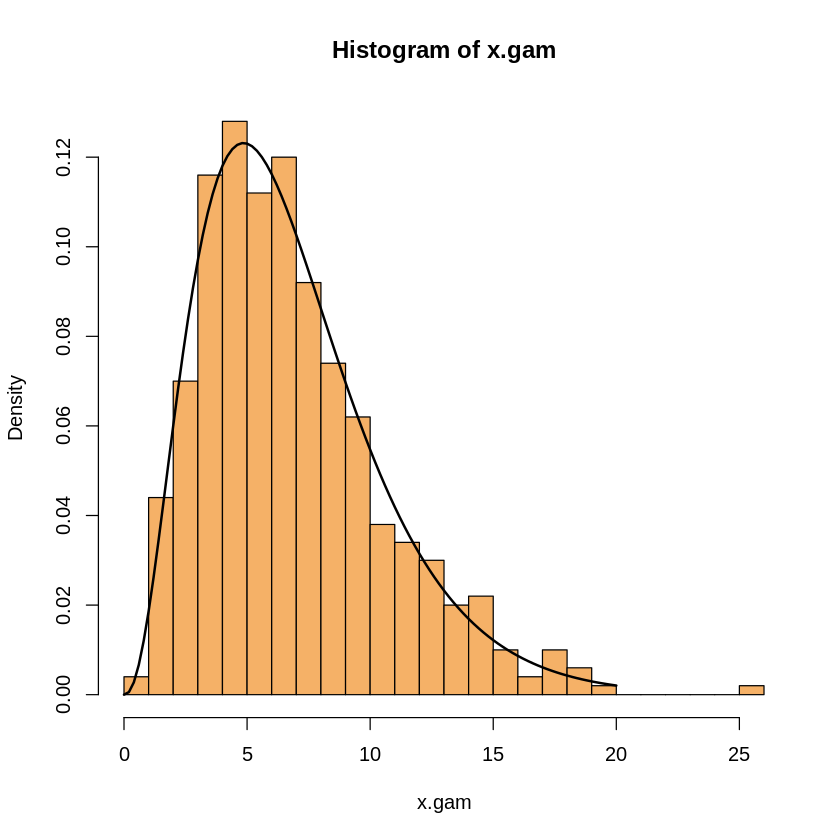

In [6]:
hist(x.gam, freq = FALSE, breaks = 20, col = '#F5B167')
curve(dgamma(x, rate = coef(fit)[1], shape = coef(fit)[2]), col = 'black', from = 0, to = 20, add = TRUE, lwd = 2)

Podríamos haber estimado un valor inicial de los parámetros utilizando el método de los momentos.

In [7]:
media = mean(x.gam)
varianza = var(x.gam)
lambda_estimada = media/varianza
alpha_estimada = media^2/varianza
lambda_estimada
alpha_estimada

[1] 0.49011

[1] 3.36778

Hemos obtenido $\lambda=0.49$ y $\alpha=3.37$. Si los usamos como imput:

In [8]:
fit2 = mle(minuslog = LL, start = list(lambda = lambda_estimada, alpha = alpha_estimada), lower = c(0.01, 0.01))
summary(fit2)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(lambda = lambda_estimada, alpha = alpha_estimada), 
    lower = c(0.01, 0.01))

Coefficients:
        Estimate Std. Error
lambda 0.4956023 0.03225524
alpha  3.4055154 0.20570436

-2 log L: 2628.345 

En este caso, llegamos al mismo mínimo, pero en casos más complejos, podríamos haber ido a parar a un mínimo local, y por ello se recomienda cierta precaución respecto a los valores iniciales.

A continuación podemos ajustar, también maximizando el likelihood, usando fitdist(). En este caso, le podemos dar simplemente la función de densidad de probabilidad (PDF) que queremos ajustar.

In [9]:
#library(MASS)
require(fitdistrplus)
fit3 = fitdist(x.gam, "gamma")

Loading required package: fitdistrplus

Loading required package: survival



In [10]:
fit3

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
       estimate Std. Error
shape 3.4053119 0.20569155
rate  0.4955558 0.03225228

Obtenemos el mismo resultado que antes, ya que el método utilizado es el mismo. Además podemos obtener gráficas que comparan el ajuste con los datos:

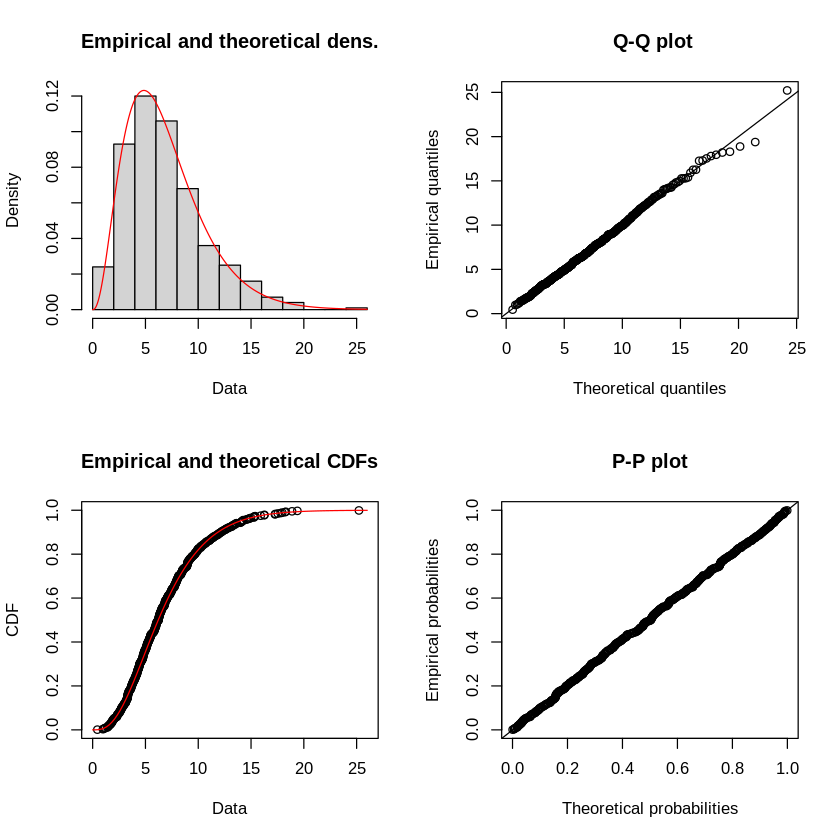

In [11]:
plotdist(x.gam, "gamma", para = list(shape = fit3$estimate[1], rate = fit3$estimate[2]))

Si queremos obtener el valor del log likelihood:

In [12]:
fit3$loglik

[1] -1314.172

Podemos aplicar tests sobre la calidad del ajuste: 

In [13]:
gofstat(fit3)

Goodness-of-fit statistics
                             1-mle-gamma
Kolmogorov-Smirnov statistic  0.01684441
Cramer-von Mises statistic    0.02132808
Anderson-Darling statistic    0.14817242

Goodness-of-fit criteria
                               1-mle-gamma
Akaike's Information Criterion    2632.345
Bayesian Information Criterion    2640.774

Los tests de K-S, Cramer-von Mises y Anderson-Darling, calculan la bondad de ajuste en base a las funciones acumuladas (el segundo a partir de las diferencias al cuadrado y el tercero teniendo más peso las discrepancias en las colas). Se deben obtener valores pequeños, si el ajuste es bueno.
AIC y BIC se calculan a partir del likelihood y el número de parámetros del modelo. Al comparar diferentes modelos, aquellos con un menor valor de AIC y BIC serán aquellos que ajusten mejor los datos.

Finalmente, podemos usar la función nls() para el ajuste, basada en el método de mínimos cuadrados.

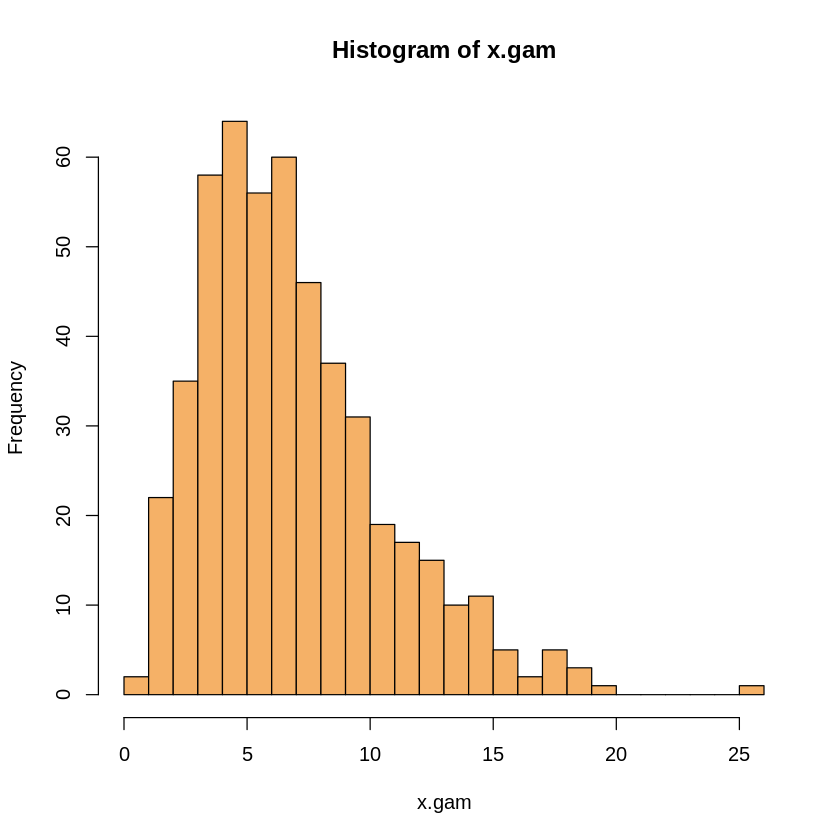

In [14]:
hdata = hist(x.gam, breaks = 20, col = '#F5B167')

In [15]:
x = hdata$mids
y = hdata$counts

In [16]:
fit4 = nls(y ~ b*(lb^a)/gamma(a)*x^(a-1)*exp(-lb*x), start = list(lb = 0.5,a = 3, b = 500))

In [17]:
summary(fit4)


Formula: y ~ b * (lb^a)/gamma(a) * x^(a - 1) * exp(-lb * x)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
lb   0.50668    0.02582   19.62 7.33e-16 ***
a    3.44635    0.14391   23.95  < 2e-16 ***
b  495.91109   10.99369   45.11  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.586 on 23 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 5.91e-06


Obtenemos del ajuste $\lambda=0.51\pm0.03$ y $\alpha=3.45\pm0.14$. Éstos dependerán de cuántos puntos hemos escogido para realizar el ajuste.

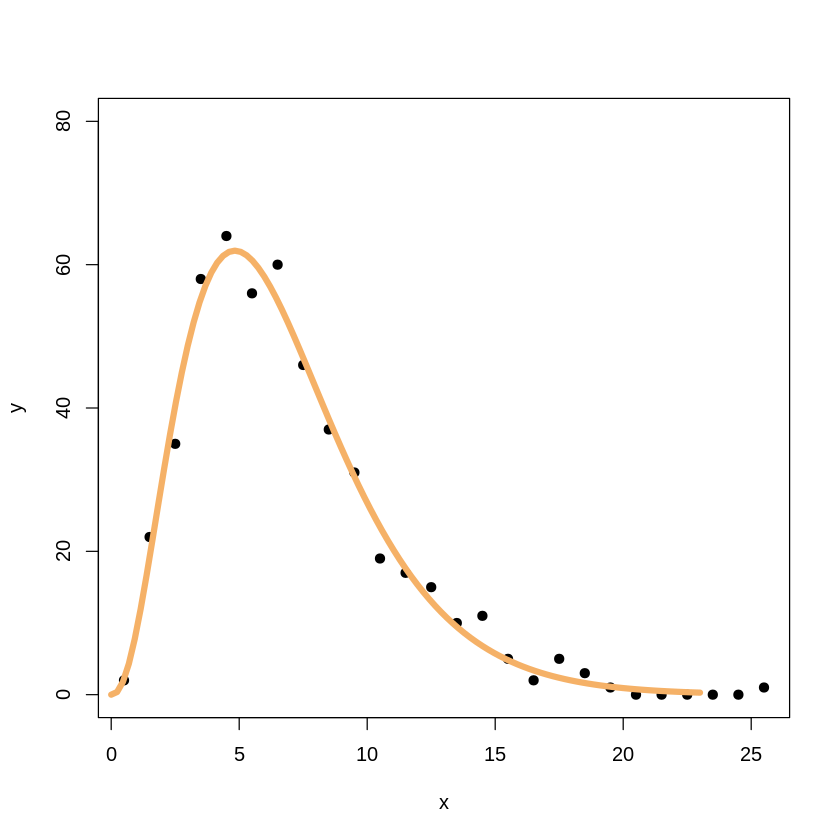

In [18]:
plot(x, y, ylim = c(0, 80), pch=19)
par1 = coef(fit4)[1]
par2 = coef(fit4)[2]
par3 = coef(fit4)[3]
curve(par3*(par1^par2)/gamma(par2)*x^(par2-1)*exp(-par1*x), 0, 23, add = T, col = '#F5B167', lwd = 5)